# YOLO v2
![alt text](https://pjreddie.com/media/image/model2.png)

(The image above is taken from the [official YOLO v2 homepage](https://pjreddie.com/darknet/yolov2/))

This example interactively demonstrates [YOLO v2](https://openaccess.thecvf.com/content_cvpr_2017/papers/Redmon_YOLO9000_Better_Faster_CVPR_2017_paper.pdf), a model for object detection.


# Preparation
Let's start by installing nnabla and accessing [nnabla-examples repository](https://github.com/sony/nnabla-examples). If you're running on Colab, make sure that your Runtime setting is set as GPU, which can be set up from the top menu (Runtime → change runtime type), and make sure to click **Connect** on the top right-hand side of the screen before you start.

In [1]:
# May show warnings for newly imported packages if run in Colab default python environment.
# Please click the `RESTART RUNTIME` to run the following script correctly.
# The error message of conflicts is acceptable.
# !pip install nnabla-ext-cuda116
!pip install nnabla-ext-cuda120
!git clone https://github.com/sony/nnabla-examples.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 MB 4.9 MB/s eta 0:00:00
fatal: destination path 'nnabla-examples' already exists and is not an empty directory.


In [2]:
%run nnabla-examples/interactive-demos/colab_utils.py
%cd nnabla-examples/object-detection/yolov2

/content/nnabla-examples/object-detection/yolov2


Let's also download pre-trained weight parameters and auxiliary file. We will also convert the weight parameters to .h5 format to make it compatible with NNabla. This may take a few minutes.

In [3]:
!wget https://pjreddie.com/media/files/yolov2.weights
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
!python convert_yolov2_weights_to_nnabla.py --input yolov2.weights

--2024-02-28 01:11:42--  https://pjreddie.com/media/files/yolov2.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203934260 (194M) [application/octet-stream]
Saving to: ‘yolov2.weights’

yolov2.weights      100%[===================>] 194.49M  12.8MB/s    in 18s     

2024-02-28 01:12:01 (11.0 MB/s) - ‘yolov2.weights’ saved [203934260/203934260]

--2024-02-28 01:12:01--  https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625 [text/plain]
Saving to: ‘coco.names’

coco.names          100%[===================>]     625  --.-KB/s    in 0s      

2024-02-

# Upload Image
Run the following cell to upload your own image.



In [12]:
from google.colab import files

img = files.upload()

Saving dog.jpeg to dog.jpeg


Let's rename the image for convenience.



In [13]:
import os
ext = os.path.splitext(list(img.keys())[-1])[-1]
os.rename(list(img.keys())[-1], "input_image{}".format(ext))
input_img = "input_image" + ext

# Object Detection
Now let's run YOLO v2 to your image and see how it performs object detection!

2024-02-28 01:16:09,801 [nnabla][INFO]: Initializing CPU extension...
2024-02-28 01:16:10,236 [nnabla][INFO]: Initializing CUDA extension...
2024-02-28 01:16:10,259 [nnabla][INFO]: Initializing cuDNN extension...
forward
done
[INFO] dog: 74.50%
[INFO] dog: 89.99%
Processing time: 33.7 [ms/image]
Input:


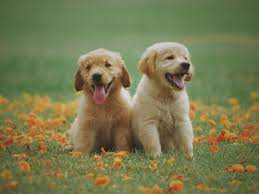

Output:


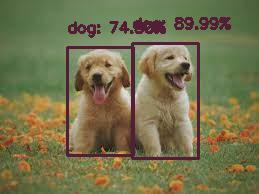

In [14]:
!python yolov2_detection.py $input_img
from IPython.display import Image,display
print('Input:')
display(Image(input_img))
output_img = "detect.input_image"+ext
print('Output:')
display(Image(output_img))

# For Smartphone Users
If you're using a smartphone with a camera, you can take a photo and use that image for this demo.
Just execute the following cell and tap `Capture` button.

If your device has multiple cameras (such as front and back) you need to select which one to use by tapping the corresponding button (which should appear near the 'Capture' button).

**Note this is an experimental support and may not work in some devices.**


<IPython.core.display.Javascript object>

Saved to photo.png


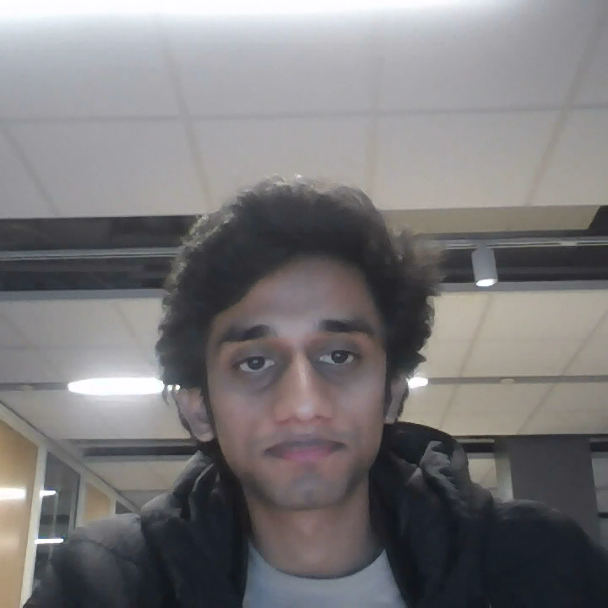

In [18]:
try:
    filename = take_photo(cam_width=608, cam_height=608)
    print('Saved to {}'.format(filename))
    # Show the image which was just taken.
    display(Image(filename))
except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))

If the photo is OK, let's try object detection. If you want to use another photo, just re-run the previous cell again.

The following cell will execute object detection on your photo.

2024-02-28 01:16:47,927 [nnabla][INFO]: Initializing CPU extension...
2024-02-28 01:16:48,349 [nnabla][INFO]: Initializing CUDA extension...
2024-02-28 01:16:48,371 [nnabla][INFO]: Initializing cuDNN extension...
forward
done
[INFO] person: 85.13%
Processing time: 33.3 [ms/image]
Output:


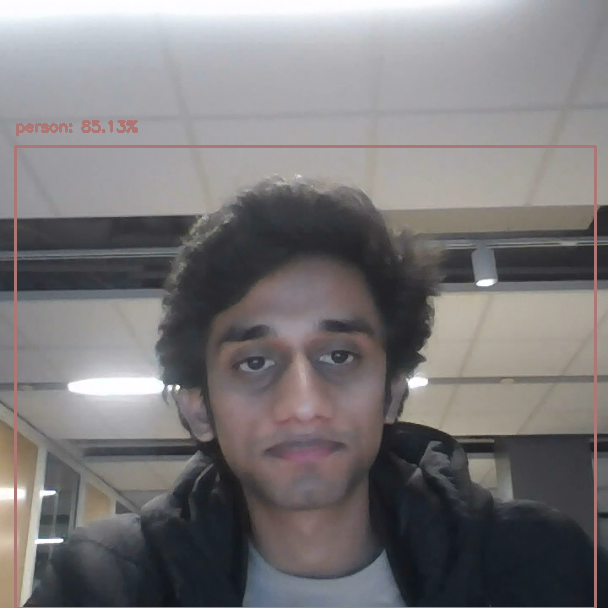

In [19]:
!python yolov2_detection.py photo.png --output photo_output.png
from IPython.display import Image,display
print('Output:')
display(Image('photo_output.png'))